In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn.preprocessing import Normalizer
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from scipy.interpolate import interp1d
import scipy
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

In [2]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t")
heads=heads.query('decade != 2000')
heads.columns=['constituent','decade','context','count']
heads['constituent']=heads['constituent'].str.replace(r'_n$', r'_h', regex=True)
heads=heads.groupby(['constituent', 'decade','context'])['count'].sum()

In [3]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t")
modifiers=modifiers.query('decade != 2000')
modifiers.columns=['constituent','decade','context','count']
modifiers['constituent']=modifiers['constituent'].str.replace(r'_n$', r'_m', regex=True)
modifiers=modifiers.groupby(['constituent', 'decade','context'])['count'].sum()

In [4]:
constituents = pd.concat([heads,modifiers])
constituents.shape

(51223824,)

In [5]:
constituents=constituents.to_sparse()

In [6]:
constituents, rows, columns = constituents.to_coo(row_levels=('constituent', 'decade'),column_levels=['context'],sort_labels=True)

In [7]:
len(columns)

48310

In [8]:
co_occ_counts_svd = TruncatedSVD(n_components=300, n_iter=10, random_state=1991)
display(co_occ_counts_svd.fit(constituents).explained_variance_ratio_.sum())
co_occ_list=co_occ_counts_svd.fit(constituents).explained_variance_ratio_
co_occ_reduced = co_occ_counts_svd.fit_transform(constituents)
co_occ_reduced = Normalizer(copy=False).fit_transform(co_occ_reduced)
co_occ_reduced=pd.DataFrame(co_occ_reduced,index=rows)
co_occ_reduced

0.9758479236901747

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
"(a_h, 1800)",0.275,-0.009,-0.014,-0.005,-0.017,0.082,0.004,-0.002,0.004,-0.074,...,0.072,-0.047,0.041,0.081,-0.025,0.048,-0.072,0.003,0.159,-0.057
"(a_h, 1810)",0.191,0.000,-0.009,-0.003,-0.017,0.083,0.005,0.009,0.002,-0.079,...,0.149,0.045,-0.000,0.074,0.005,0.122,-0.096,0.109,0.152,-0.014
"(a_h, 1820)",0.292,-0.012,-0.019,-0.004,-0.023,0.111,0.006,0.000,0.003,-0.096,...,0.131,0.040,0.011,0.068,-0.001,0.085,-0.085,0.092,0.153,-0.022
"(a_h, 1830)",0.391,-0.013,-0.024,-0.007,-0.034,0.174,0.006,-0.003,-0.001,-0.123,...,0.084,-0.023,0.039,0.083,0.004,0.024,-0.068,0.065,0.163,-0.035
"(a_h, 1840)",0.558,-0.033,-0.041,-0.011,-0.049,0.227,-0.005,-0.015,0.003,-0.181,...,0.072,-0.031,0.028,0.083,-0.001,0.010,-0.049,0.035,0.142,-0.039
"(a_h, 1850)",0.604,0.094,0.047,-0.042,-0.044,0.208,-0.014,-0.044,-0.000,-0.145,...,-0.008,-0.104,0.066,0.068,0.001,-0.060,-0.011,-0.022,0.116,-0.064
"(a_h, 1860)",0.613,-0.022,-0.032,-0.015,-0.053,0.234,-0.001,-0.009,0.003,-0.187,...,-0.021,-0.114,0.072,0.080,-0.017,-0.091,0.010,-0.055,0.105,-0.074
"(a_h, 1870)",0.572,0.007,-0.006,-0.017,-0.050,0.220,0.003,-0.004,0.002,-0.176,...,-0.033,-0.133,0.077,0.105,-0.004,-0.120,0.032,-0.066,0.107,-0.091
"(a_h, 1880)",0.589,-0.000,-0.011,-0.016,-0.048,0.212,0.010,0.014,0.003,-0.189,...,-0.045,-0.138,0.073,0.094,-0.013,-0.150,0.030,-0.071,0.101,-0.094
"(a_h, 1890)",0.631,-0.009,-0.019,-0.017,-0.052,0.227,0.008,0.010,0.002,-0.192,...,-0.041,-0.122,0.068,0.097,-0.013,-0.130,0.030,-0.070,0.088,-0.078


In [9]:
co_occ_reduced.index = pd.MultiIndex.from_tuples(co_occ_reduced.index, names=['constituent', 'decade'])

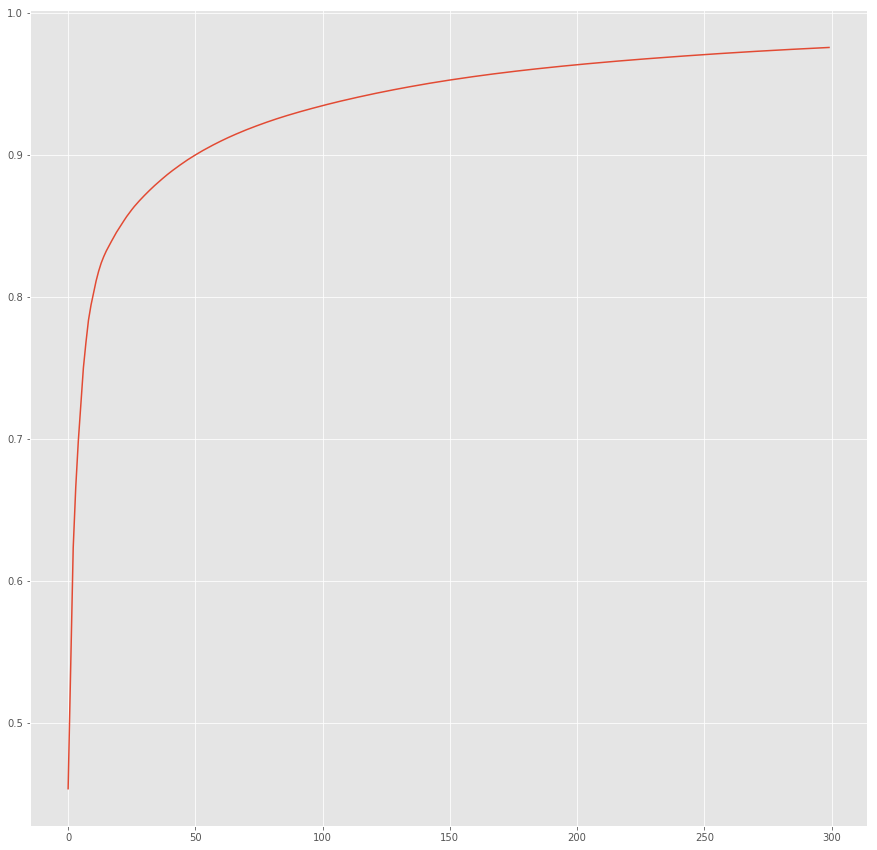

In [10]:
pd.Series(co_occ_list).cumsum().plot(figsize=[15,15])

In [11]:
co_occ_reduced

0      1      2      3      4      5      6      7    \
constituent     decade                                                          
a_h             1800   0.275 -0.009 -0.014 -0.005 -0.017  0.082  0.004 -0.002   
                1810   0.191  0.000 -0.009 -0.003 -0.017  0.083  0.005  0.009   
                1820   0.292 -0.012 -0.019 -0.004 -0.023  0.111  0.006  0.000   
                1830   0.391 -0.013 -0.024 -0.007 -0.034  0.174  0.006 -0.003   
                1840   0.558 -0.033 -0.041 -0.011 -0.049  0.227 -0.005 -0.015   
                1850   0.604  0.094  0.047 -0.042 -0.044  0.208 -0.014 -0.044   
                1860   0.613 -0.022 -0.032 -0.015 -0.053  0.234 -0.001 -0.009   
                1870   0.572  0.007 -0.006 -0.017 -0.050  0.220  0.003 -0.004   
                1880   0.589 -0.000 -0.011 -0.016 -0.048  0.212  0.010  0.014   
                1890   0.631 -0.009 -0.019 -0.017 -0.052  0.227  0.008  0.010   
                1900   0.671 -0.019 -0.036 -0.017 -0.057  0.240  0.000 -0.005   
                1910   0.501 -0.023 -0.030 -0.009 -0.046  0.196 -0.003  0.004   
                1920   0.466 -0.014 -0.030 -0.010 -0.043  0.185 -0.004 -0.006   
                1930   0.425 -0.013 -0.022 -0.010 -0.039  0.169 -0.003 -0.007   
                1940   0.410 -0.014 -0.020  0.019 -0.036  0.166 -0.005 -0.006   
                1950   0.411  0.041  0.023 -0.008 -0.032  0.147  0.012 -0.002   
                1960   0.453  0.001 -0.010 -0.002 -0.040  0.178 -0.001 -0.006   
                1970   0.444 -0.004 -0.003 -0.002 -0.040  0.180 -0.004 -0.003   
                1980   0.399 -0.000 -0.007 -0.008 -0.036  0.163 -0.003  0.003   
                1990   0.480 -0.004 -0.015 -0.003 -0.042  0.185 -0.004  0.002   
a_m             1800   0.510 -0.032 -0.048 -0.012 -0.051  0.221 -0.015 -0.020   
                1810   0.415 -0.029 -0.041 -0.010 -0.038  0.157 -0.009 -0.018   
                1820   0.189 -0.011 -0.017 -0.003 -0.019  0.085 -0.003  0.003   
                1830   0.087 -0.005 -0.008 -0.001 -0.009  0.041 -0.001  0.005   
                1840   0.071 -0.003 -0.006  0.018 -0.005  0.013  0.001 -0.000   
                1850   0.124 -0.007 -0.011 -0.003 -0.012  0.055 -0.003 -0.002   
                1860   0.136 -0.008 -0.012  0.001 -0.013  0.054 -0.004 -0.006   
                1870   0.204  0.001 -0.010 -0.007 -0.019  0.084 -0.006 -0.010   
                1880   0.159  0.061  0.033 -0.017 -0.013  0.054 -0.008 -0.017   
                1890   0.187 -0.010 -0.017  0.001 -0.017  0.071 -0.005 -0.004   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
zygapophyseal_m 1970   0.002 -0.001 -0.001 -0.000 -0.002  0.013 -0.000  0.000   
                1980   0.021 -0.010 -0.002 -0.001 -0.023  0.140  0.003 -0.005   
                1990   0.021 -0.010 -0.002 -0.001 -0.023  0.140  0.003 -0.005   
zygmunt_h       1990   0.369 -0.075 -0.079  0.001  0.035 -0.341  0.061 -0.041   
zygomycetes_h   1970   0.022  0.006  0.000  0.009  0.002  0.002  0.020  0.083   
                1980   0.022  0.006  0.000  0.009  0.002  0.002  0.020  0.083   
                1990   0.022  0.006  0.000  0.009  0.002  0.002  0.020  0.083   
zygote_h        1980   0.002 -0.000 -0.000  0.001 -0.002  0.010  0.002  0.011   
                1990   0.019 -0.004  0.002  0.006  0.002  0.011  0.010  0.080   
zygote_m        1920   0.787 -0.046 -0.071 -0.018 -0.077  0.332 -0.021 -0.029   
                1930   0.804 -0.048 -0.073 -0.019 -0.079  0.339 -0.023 -0.033   
                1940   0.826 -0.052 -0.078 -0.021 -0.082  0.350 -0.026 -0.044   
                1950   0.804 -0.048 -0.073 -0.019 -0.079  0.339 -0.023 -0.033   
                1960   0.669 -0.036 -0.057 -0.015 -0.064  0.281 -0.014 -0.010   
                1970   0.780 -0.046 -0.070 -0.018 -0.076  0.329 -0.021 -0.027   
                1980   0.745 -0.043 -0.066 -0.017 -0.072  0.313 -0.018 -0.021   
                1990   0.191 -0.003 -0.009 -0.001 -0.015

In [ ]:
co_occ_reduced.to_csv("/data/dharp/compounding/datasets/constituents_dim_reduced.csv",sep="\t",header=False)

In [26]:
constituents.mean()

0.0009632004464313289